In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv("steam_games.csv")

In [3]:
df.describe(include= 'all')

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
count,24064,28852,32133,30085,32135,30068,31972,225.000000,32133,31465,30750.000000,32135,3.213300e+04,28836,24953,2607.000000
unique,8236,883,32094,30054,32135,3582,15395,NaN,32132,4649,NaN,2,NaN,10992,18,NaN
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",NaN,http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],NaN,False,NaN,Ubisoft - San Francisco,Mixed,NaN
freq,385,1880,3,3,1,100,1292,NaN,2,2794,NaN,30188,NaN,1259,4103,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.930533,NaN,NaN,8.899991,NaN,4.517574e+05,NaN,NaN,72.255466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.492643,NaN,NaN,16.342327,NaN,1.827140e+05,NaN,NaN,10.833525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,0.000000,NaN,1.000000e+01,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000,NaN,NaN,2.990000,NaN,3.292800e+05,NaN,NaN,66.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,4.990000,NaN,4.520600e+05,NaN,NaN,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,9.990000,NaN,5.934000e+05,NaN,NaN,80.000000


In [4]:
df.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price             float64
early_access         bool
id                float64
developer          object
sentiment          object
metascore         float64
dtype: object

Veamos cuantos valores faltantes posee cada columna del DataFrame:

In [5]:
nulls = df.isnull().sum()
dict(nulls)

{'publisher': 8071,
 'genres': 3283,
 'app_name': 2,
 'title': 2050,
 'url': 0,
 'release_date': 2067,
 'tags': 163,
 'discount_price': 31910,
 'reviews_url': 2,
 'specs': 670,
 'price': 1385,
 'early_access': 0,
 'id': 2,
 'developer': 3299,
 'sentiment': 7182,
 'metascore': 29528}

Podemos observar que todo los valores faltantes se distribuyen en todo el dataset, exceptuando dos columnas: *"url"* y *"early_access"*. Luego tenemos columnas con muchos más valores faltantes que datos válidos, como: *"metascore"* o *"discount_price"*.

Visualicemos, a continuación, como se distribuyen los valores faltantes en función de su posición en el set con el siguiente gráfico:

<Axes: >

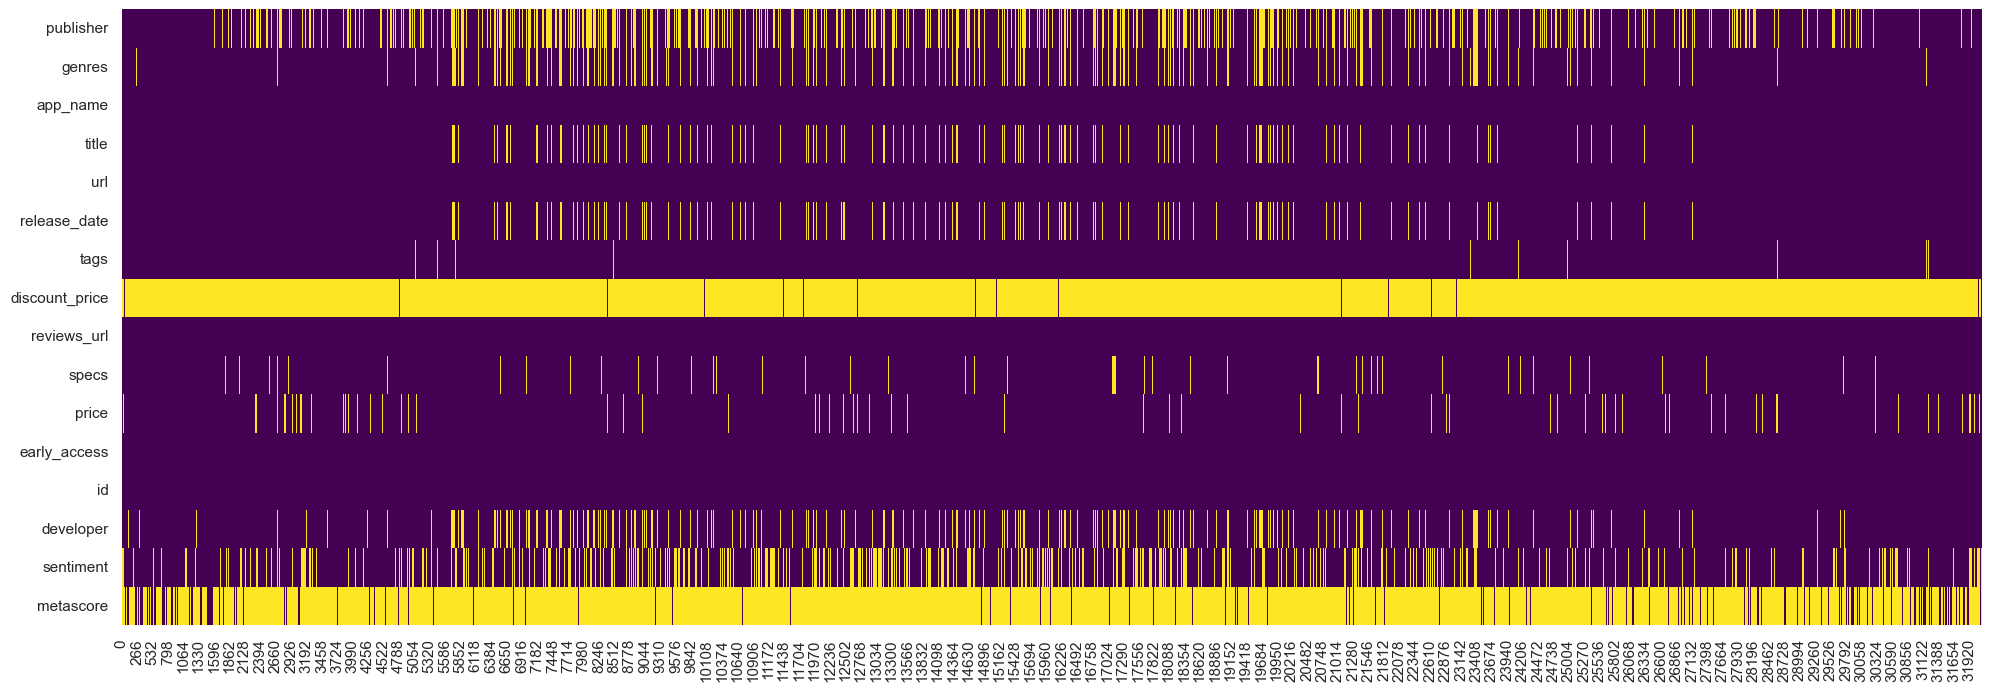

In [6]:
plt.figure(figsize= (24,8))
sns.heatmap(df.isnull().astype(int).T, cmap= 'viridis', cbar= False)

Podemos observar que los valores no tienen ninguna condición que provoque la presencia de valores nulos.

Veamos como de relacionados están los precios de los juegos con el metascore que recibieron y con los sentimientos que causó.

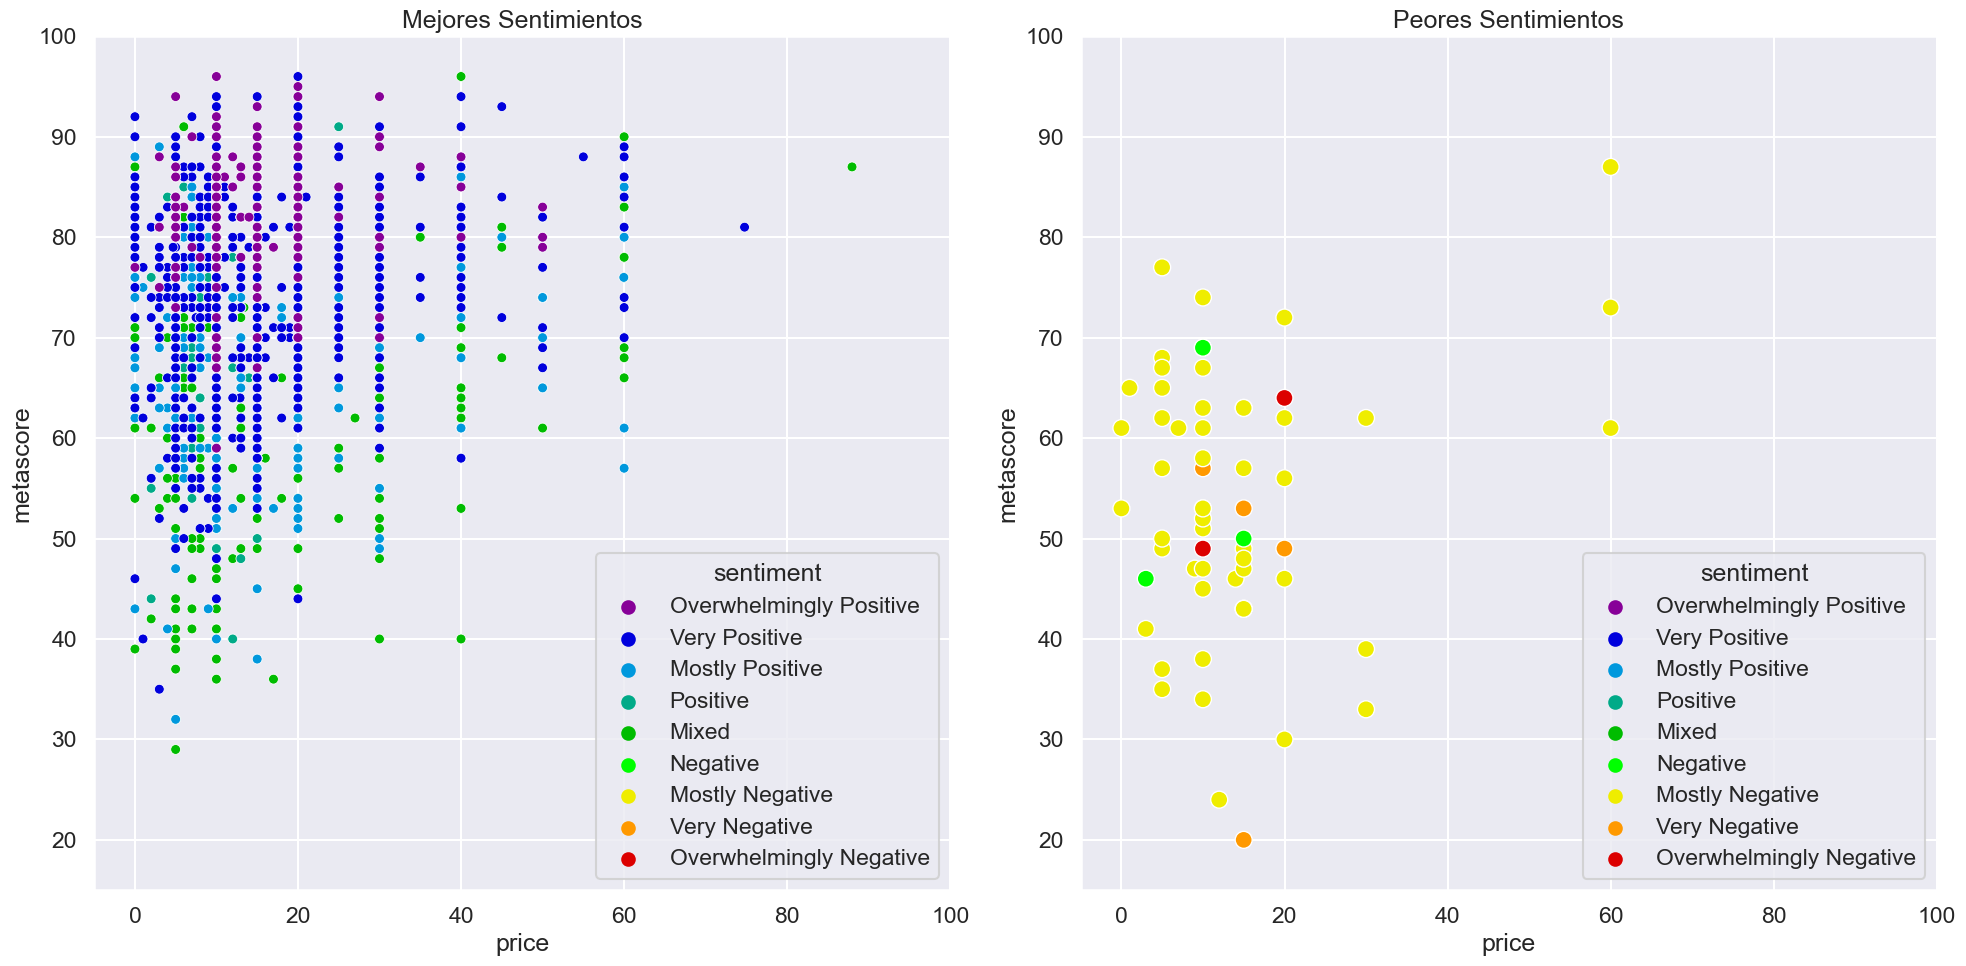

In [79]:
# Filtrar los valores que no contienen la palabra "user" en la columna "sentiment"
_df = df[~df['sentiment'].str.contains("user", na=False)]

sentiment_order = [
    "Overwhelmingly Positive",
    "Very Positive",
    "Mostly Positive",
    "Positive",
    "Mixed",
    "Negative",
    "Mostly Negative",
    "Very Negative",
    "Overwhelmingly Negative"
]

# Crear una categoría personalizada para la columna "sentiment"
_df['sentiment'] = pd.Categorical(_df['sentiment'], categories=sentiment_order, ordered=True)

# Ordenar el DataFrame según la categoría personalizada
_df = _df.sort_values('sentiment', ascending=False)

# Dividir el DataFrame en dos DataFrames separados: mejores_sentimientos y peores_sentimientos
mejores_sentimientos = _df[_df['sentiment'].isin(['Overwhelmingly Positive', 'Very Positive', 'Mostly Positive', 'Positive', 'Mixed'])]
peores_sentimientos = _df[_df['sentiment'].isin(['Negative', 'Mostly Negative', 'Very Negative', 'Overwhelmingly Negative'])]

# Crear dos gráficos separados para cada DataFrame con los mismos límites en los ejes
plt.figure(figsize=(20, 10))
sns.set(style='darkgrid', palette= 'bright')
sns.set(context= 'talk')

# Primer gráfico para los mejores sentimientos
plt.subplot(1, 2, 1)
sns.scatterplot(x=mejores_sentimientos['price'], y=mejores_sentimientos['metascore'], hue=mejores_sentimientos['sentiment'], palette='nipy_spectral', s=50)
plt.title('Mejores Sentimientos')
plt.xlim(-5, 100)
plt.ylim(15, 100)

# Segundo gráfico para los peores sentimientos
plt.subplot(1,2, 2)
sns.scatterplot(x=peores_sentimientos['price'], y=peores_sentimientos['metascore'], hue=peores_sentimientos['sentiment'], palette='nipy_spectral', s=150)
plt.title('Peores Sentimientos')
plt.xlim(-5, 100)
plt.ylim(15, 100)

# Ajustar la disposición de los gráficos para que no haya superposición de etiquetas
plt.tight_layout()

# Mostrar los dos gráficos
plt.show()


Podemos concluir, con los dos gráficos anteriores, que los juegos que tuvieron una crítica negativa **(gráfico de la deracha)** no obtuvieron un puntaje alto en metascore, independientemente de su precio. Más bien, se concentran en el medio del metascore.

En cambio, los juegos bien recibidos por la crítica, obtuvieron una puntuación mayor de metascore. Además, podemos deducir que el precio afecta en la crítica del juego: ningún juego con un precio elevado *(mayor a $50)* tuvo la máxima distinción dentro del sentimiento *("Overwhelmingly Positive")*.

También, dentro del primer gráfico, podemos observar como la mayoría de juegos que tuvieron la calificación de *"Mixed"* está, en promedio, en la zona media de la puntuación del metascore. Por debajo de las demás categorías.

Comparando ambos gráficos, también podemos deducir que, en proporción, hay muchos más juegos de buena calidad, con un buen recibimiento de la crítica y con un buen metascore.

Veamos, que tan relacionadas están las variables del dataset, y si tienen impacto en el precio.

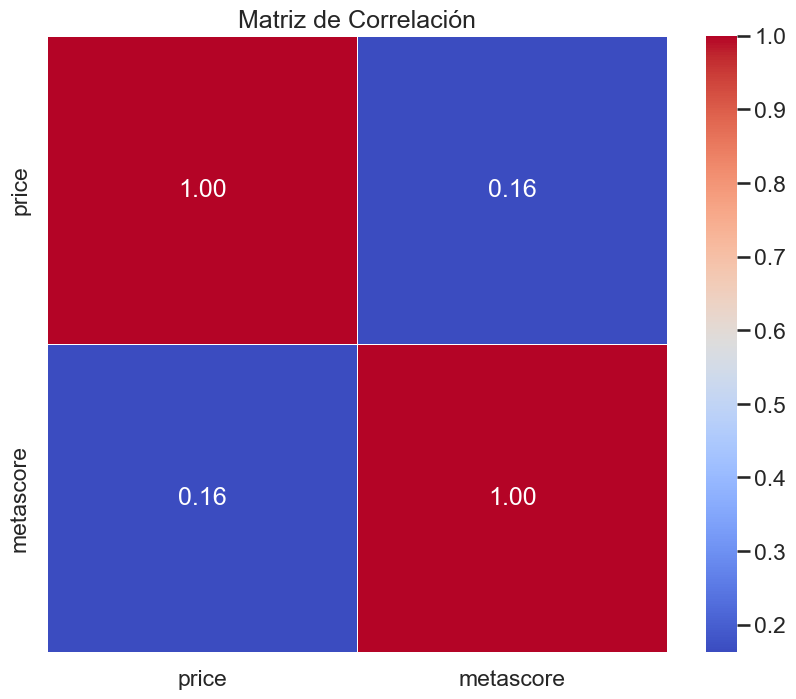

In [108]:
matrix_corr = df[['price','metascore']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


En la matriz podemos observar en la correlación entre el precio y el metascore del juego, es cercana al 0, esto nos indica, como también vimos anteriormente, que ambos valores son independientes.


Ahora veamos como se distribuyen independientemente con los siguientes histogramas.

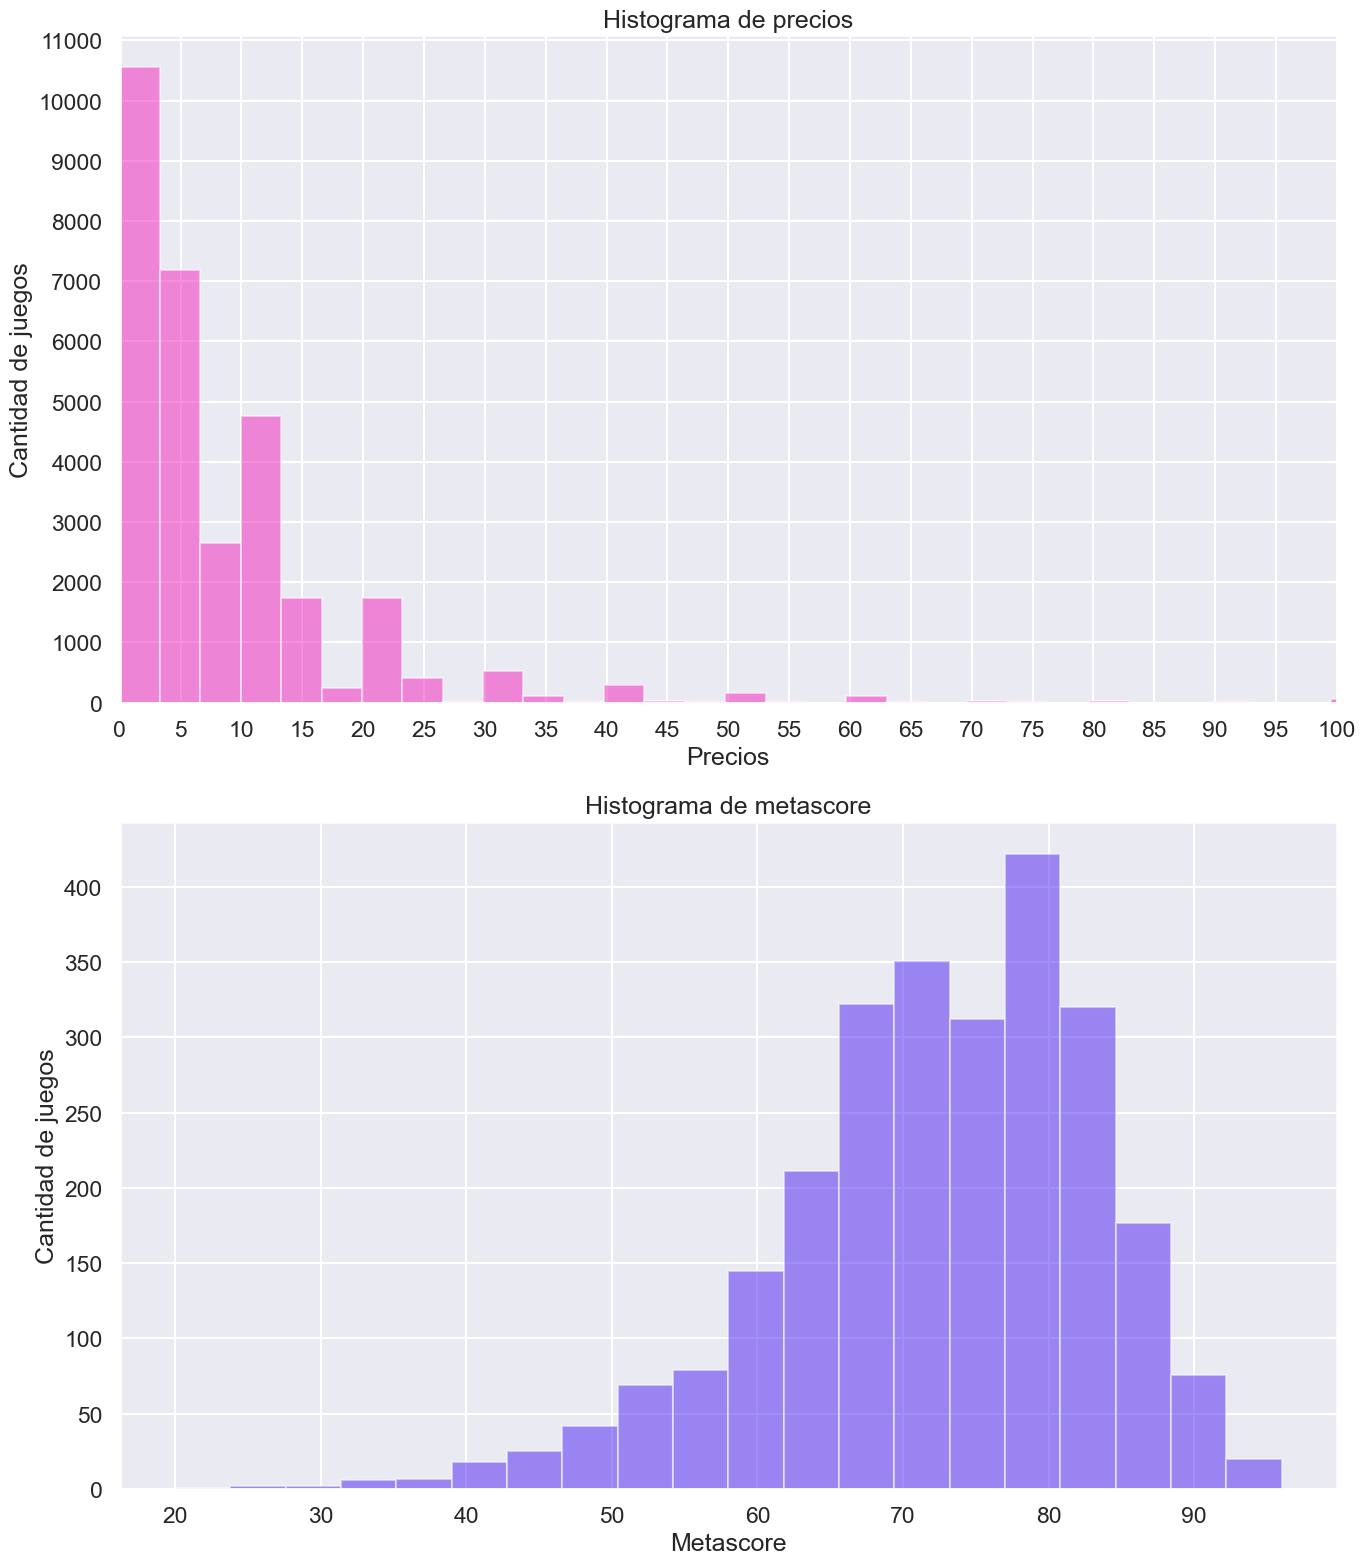

In [128]:
fig, ax = plt.subplots(2, 1, figsize= (14,16))

ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.linspace(0,100,21))
ax[0].set_yticks(np.linspace(0, 11000, 12))
ax[0].hist(df['price'], bins= 300, color= "#F320b9", alpha= 0.5)
ax[0].set_title("Histograma de precios")
ax[0].set_xlabel("Precios")
ax[0].set_ylabel("Cantidad de juegos")

ax[1].hist(df['metascore'], bins= 20, color= "#4920F3", alpha= 0.5)
ax[1].set_title("Histograma de metascore")
ax[1].set_xlabel("Metascore")
ax[1].set_ylabel("Cantidad de juegos")

plt.tight_layout()
plt.show()

A partir de los histogramas podemos concluir que no se necesitan más de *$10.00* para poder obtener cualquiera de los 17000 juegos por debajo de ese precio.

En el histograma del metascore de los juegos podemos ver que claramente la mayoría cumple con lo que promete y obtiene una puntuación regular *(de entre 65 y 80)*. Mientras que hay otros, muy pocos, que superan las expectativas y obtienen una puntuación mayor a 90 puntos.Por el otro lado, también hay juegos que decepcionan completamente y se les otorga una puntuación menor a 60 puntos, pero sin ser muchos tampoco.

Veamos por último, en que cantidades se reparten los géneros de los juegos, sus etiquetas y sus especificaciones.

In [329]:
gradient_colors = ['#ff006a', '#ff196a', '#ff336a', '#ff4c6a', '#ff666a', '#ff7f6a', '#ff996a', '#ffb26a', '#ffcc6a', '#ffdb6a', '#ffea6a', '#fff76a', '#f0ff6a', '#dbff6a', '#c5ff6a', '#b2ff6a', '#99ff6a', '#80ff6a', '#66ff6a', '#4cff6a', '#b3d9ff', '#99c2ff', '#80abff', '#6685ff', '#4d6eff', '#3357e6', '#1a40cc', '#0029b3', "#4b10Ff"]

In [145]:
import ast
lista = []
for registro in df['genres']:
    try: 
        lista.append(ast.literal_eval(registro))
    except ValueError:
        lista.append([])
df['genres'] = lista
generos = {}
for registro in df['genres']:
    try:
        for gen in registro:
            generos[f"{gen}"] = 0
    except TypeError:
        pass
for registro in df['genres']:
    try:
        for gen in registro:
            generos[f"{gen}"] += 1
    except TypeError:
            pass


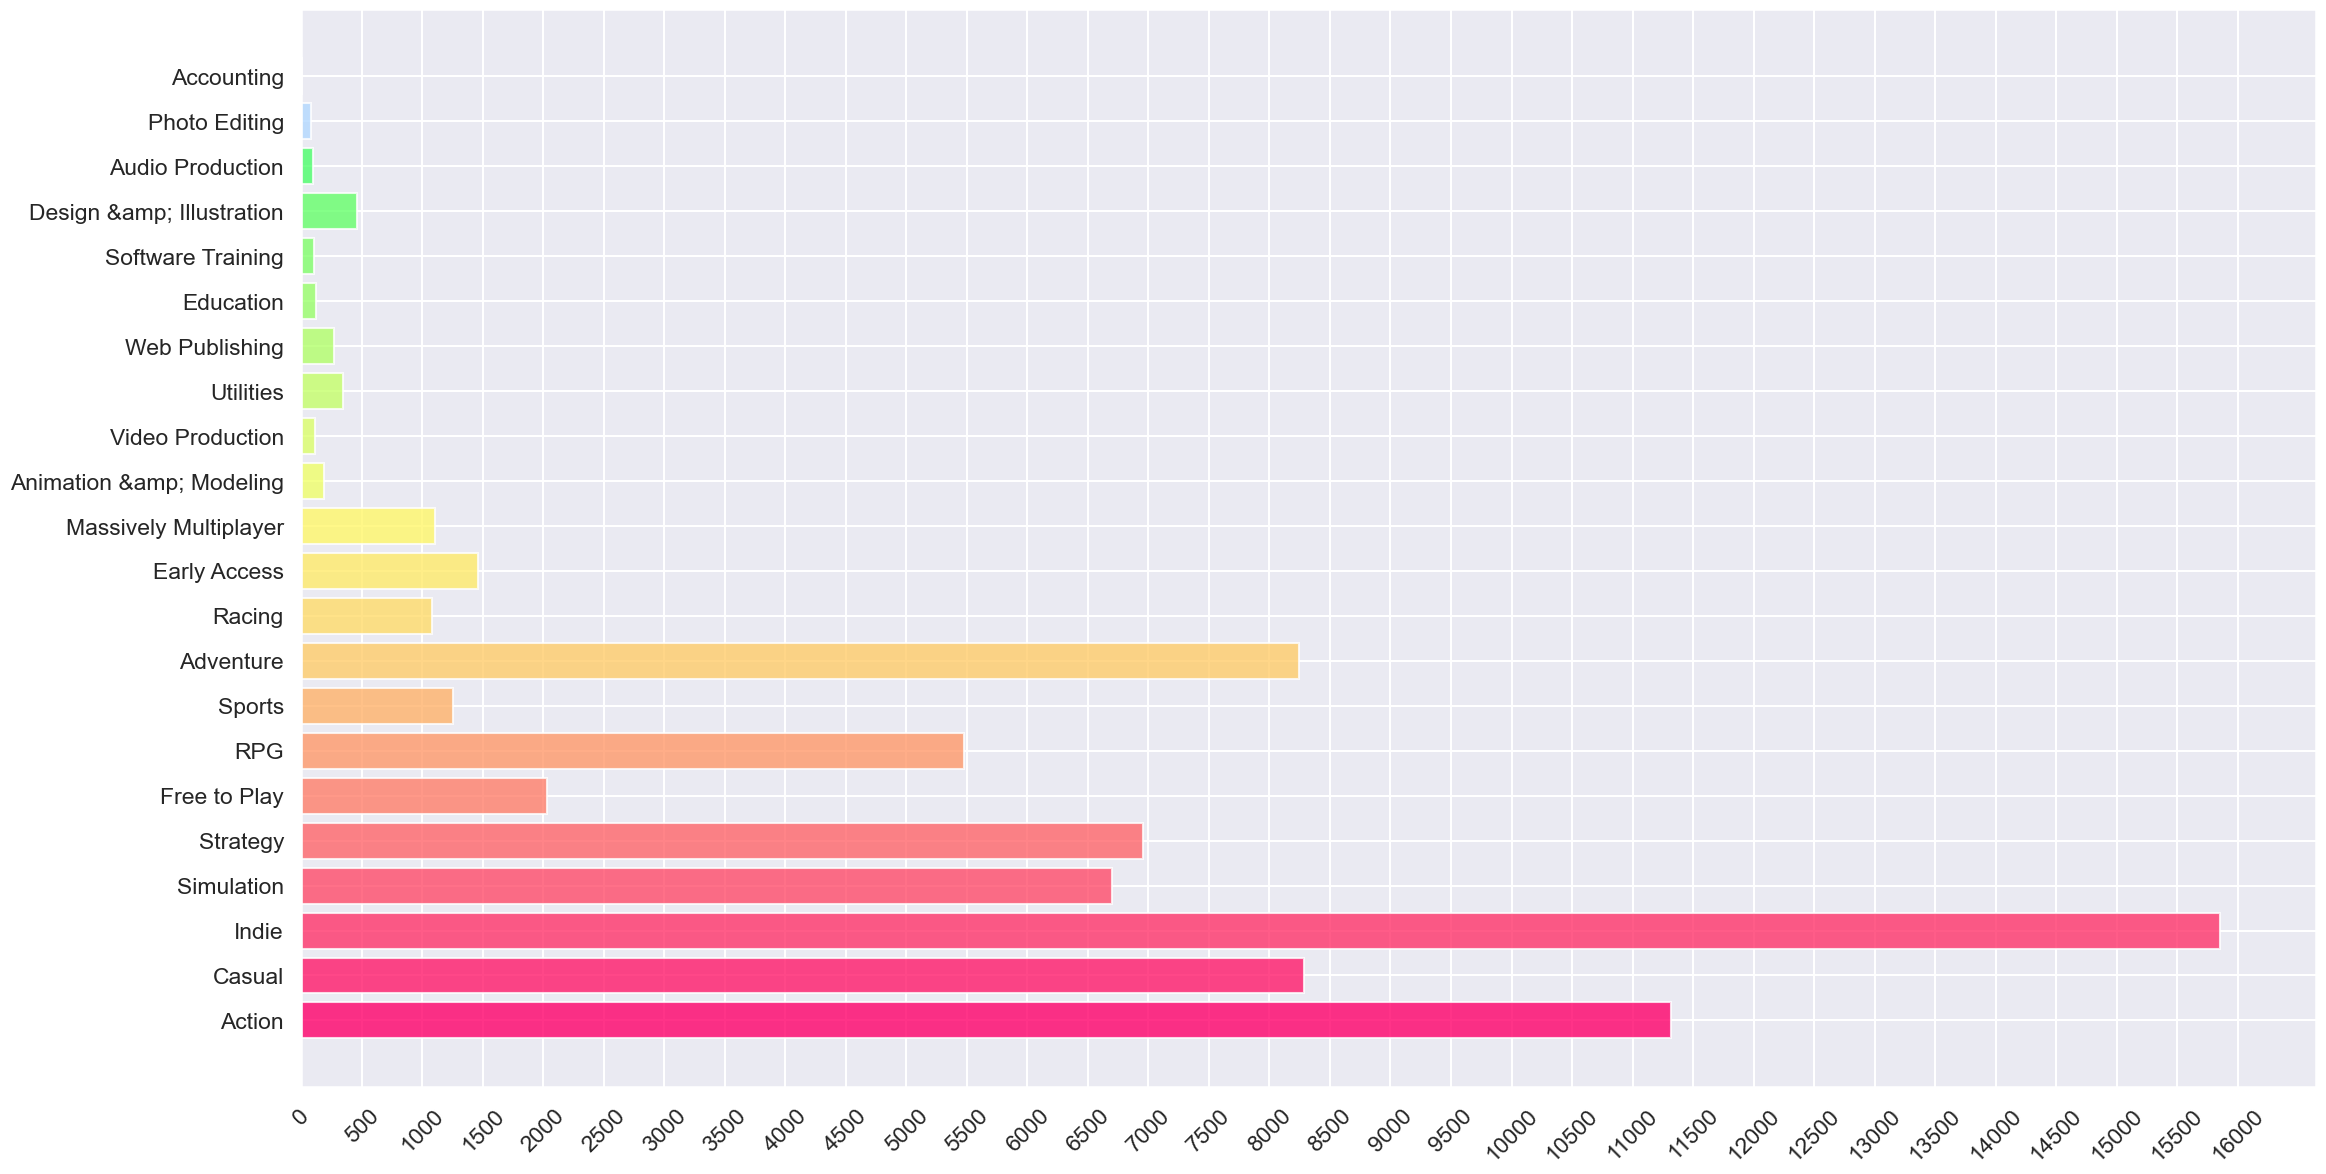

In [331]:
plt.figure(figsize= (26,14))
plt.barh(list(generos.keys()), list(generos.values()), color= gradient_colors, alpha= 0.8)

plt.xticks(np.linspace(0, 16000, 33), rotation= 45)
plt.show()

Observemos que el género que más presencia tiene al momento de calificar a los juegos por género es el género indie, seguido del género de acción. Es decir, hay más de 15000 juegos catalogados como *"indies"*.

In [299]:
lista = []
for registro in df['tags']:
    try:
        lista.append(ast.literal_eval(registro))
    except ValueError:
        lista.append([])

etiquetas = {}
for registro in lista:
    for tag in registro:
        etiquetas[f"{tag}"] = 0

for registro in lista:
    for tag in registro:
        etiquetas[f"{tag}"] += 1

tags = {"Other" : 0}
relegados = []
for registro in etiquetas.keys():
    if etiquetas[f"{registro}"] >= 1000:
        tags[f"{registro}"] = etiquetas[f"{registro}"]
    else:
        relegados.append(registro)


for registro in lista:
    for tag in registro:
        if tag not in relegados:
            pass
        elif tag in relegados:
            tags["Other"] += 1
            break

cont = []
for e in lista:
    cont.append(len(e))

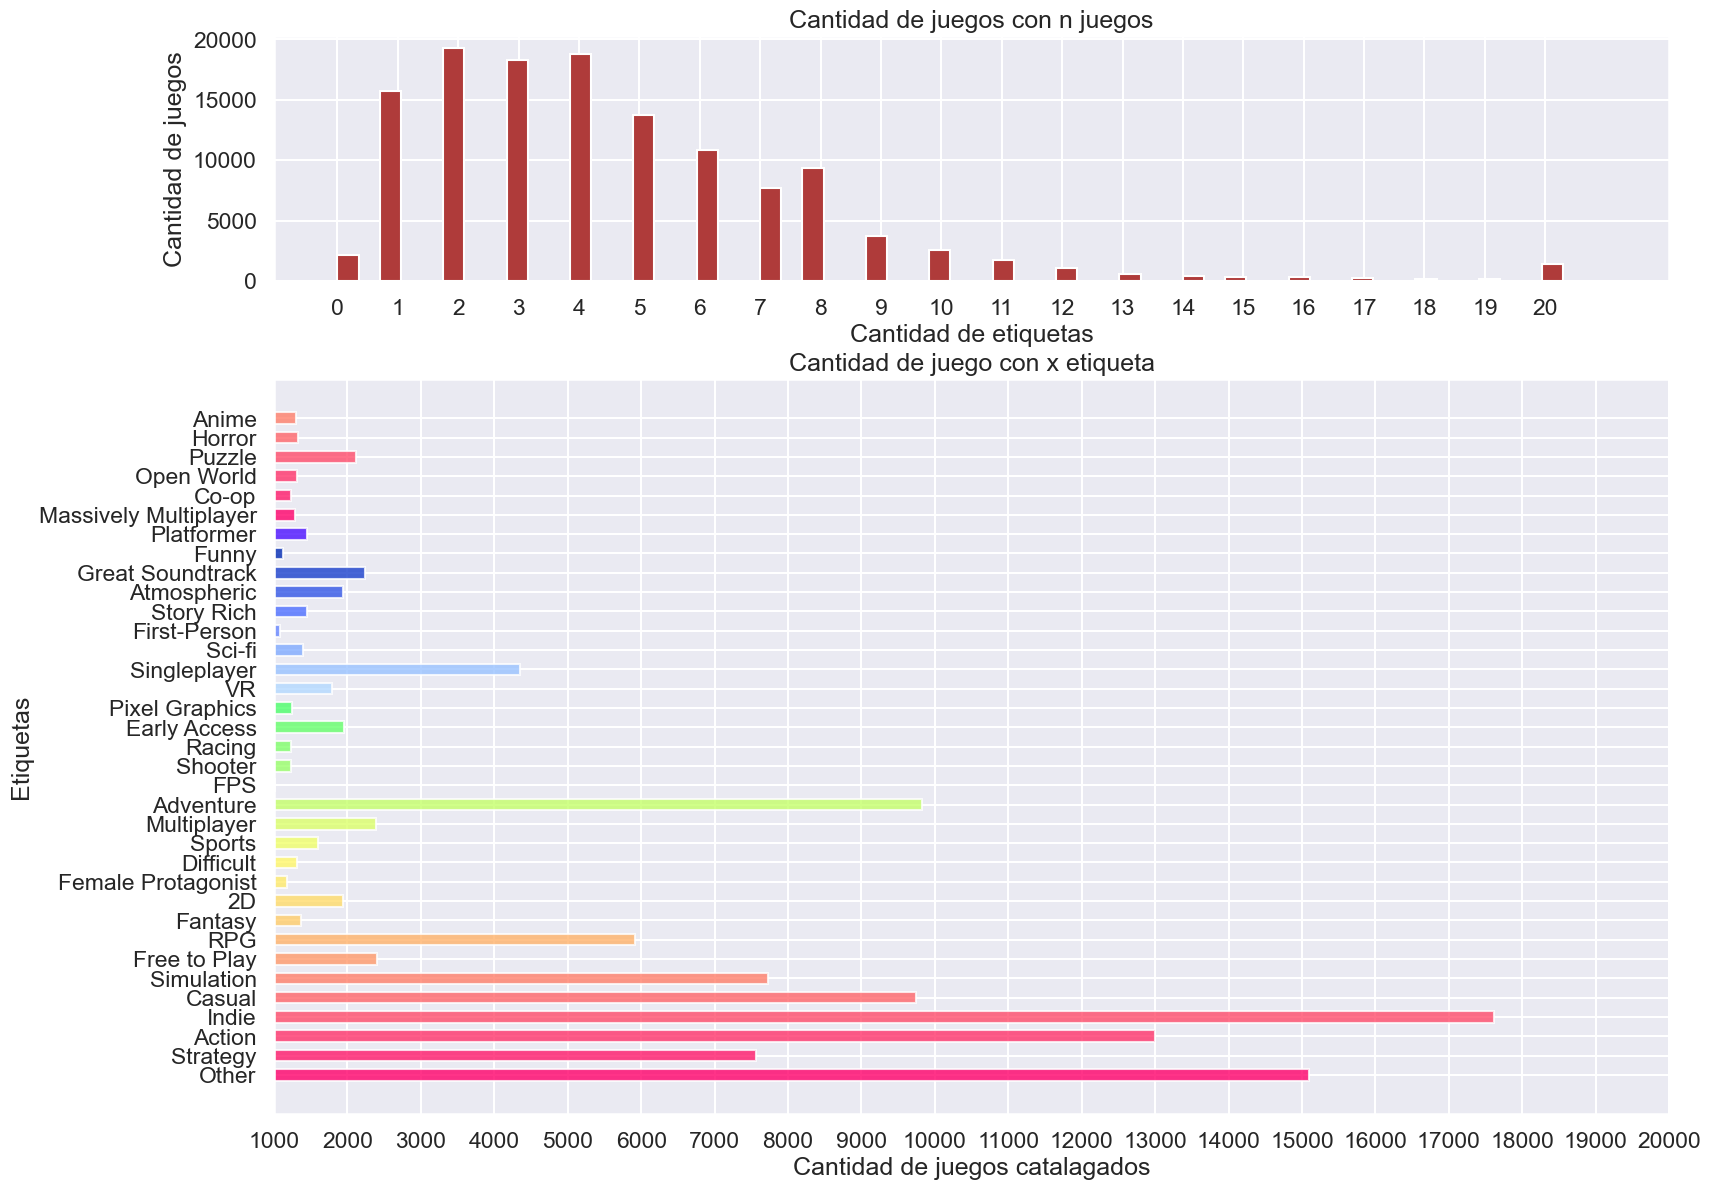

In [334]:
fig, ax = plt.subplots(2, 1, figsize= (18,14), gridspec_kw={'height_ratios': [1, 3]})

ax[0].hist(cont, bins= 60, color= '#Af3b3a')
ax[0].set_xticks(np.linspace(0, 20, 21))
ax[0].set_title("Cantidad de juegos con n juegos")
ax[0].set_xlabel("Cantidad de etiquetas")
ax[0].set_ylabel("Cantidad de juegos")

ax[1].barh(list(tags.keys()), list(tags.values()), color= gradient_colors, alpha= 0.8, height= 0.6)
ax[1].set_xticks(np.linspace(0,20000, 21))
ax[1].set_xlim(1000, 20000)
ax[1].set_title("Cantidad de juego con x etiqueta")
ax[1].set_ylabel("Etiquetas")
ax[1].set_xlabel("Cantidad de juegos catalagados")

plt.show()

En el caso de las etiquetas, podemos observar en el histograma, que en la mayoría de los juegos existe una etiqueta como mínimo. Muchísimos juegos tienen entre una a cinco etiquetas. También hay juegos que poseen más etiquetas, pero mediante aumenta la cantidad de etiquetas, disminuye la cantidad de juegos que poseen esa cantidad.

Luego, en el gráfico de barras, podemos observar las etiquetas que se encuentran en más de 1000 juegos distintos. Teniendo a la etiqueta del género **indie** con aparición en más de 17000 juegos. Luego podemos ver que hay muchas más etiquetas que no entraron en este gráfico y están presentes en, poco más, de 15000 juegos. 

In [306]:
_lista_specs = []
for registro in df['specs']:
    try:
        _lista_specs.append(ast.literal_eval(registro))
    except ValueError:
        _lista_specs.append([])

e_specs = {}
for registro in _lista_specs:
    for spec in registro:
        e_specs[f"{spec}"] = 0

for registro in _lista_specs:
    for spec in registro:
        e_specs[f"{spec}"] += 1

specs = {"Other" : 0}
Rel_specs = []
for registro in e_specs.keys():
    if e_specs[f"{registro}"] >= 500:
        specs[f"{registro}"] = e_specs[f"{registro}"]
    else:
        Rel_specs.append(registro)


for registro in _lista_specs:
    for spec in registro:
        if spec not in Rel_specs:
            pass
        elif spec in Rel_specs:
            specs["Other"] += 1
            break

cont_s = []
for e in _lista_specs:
    cont.append(len(e))

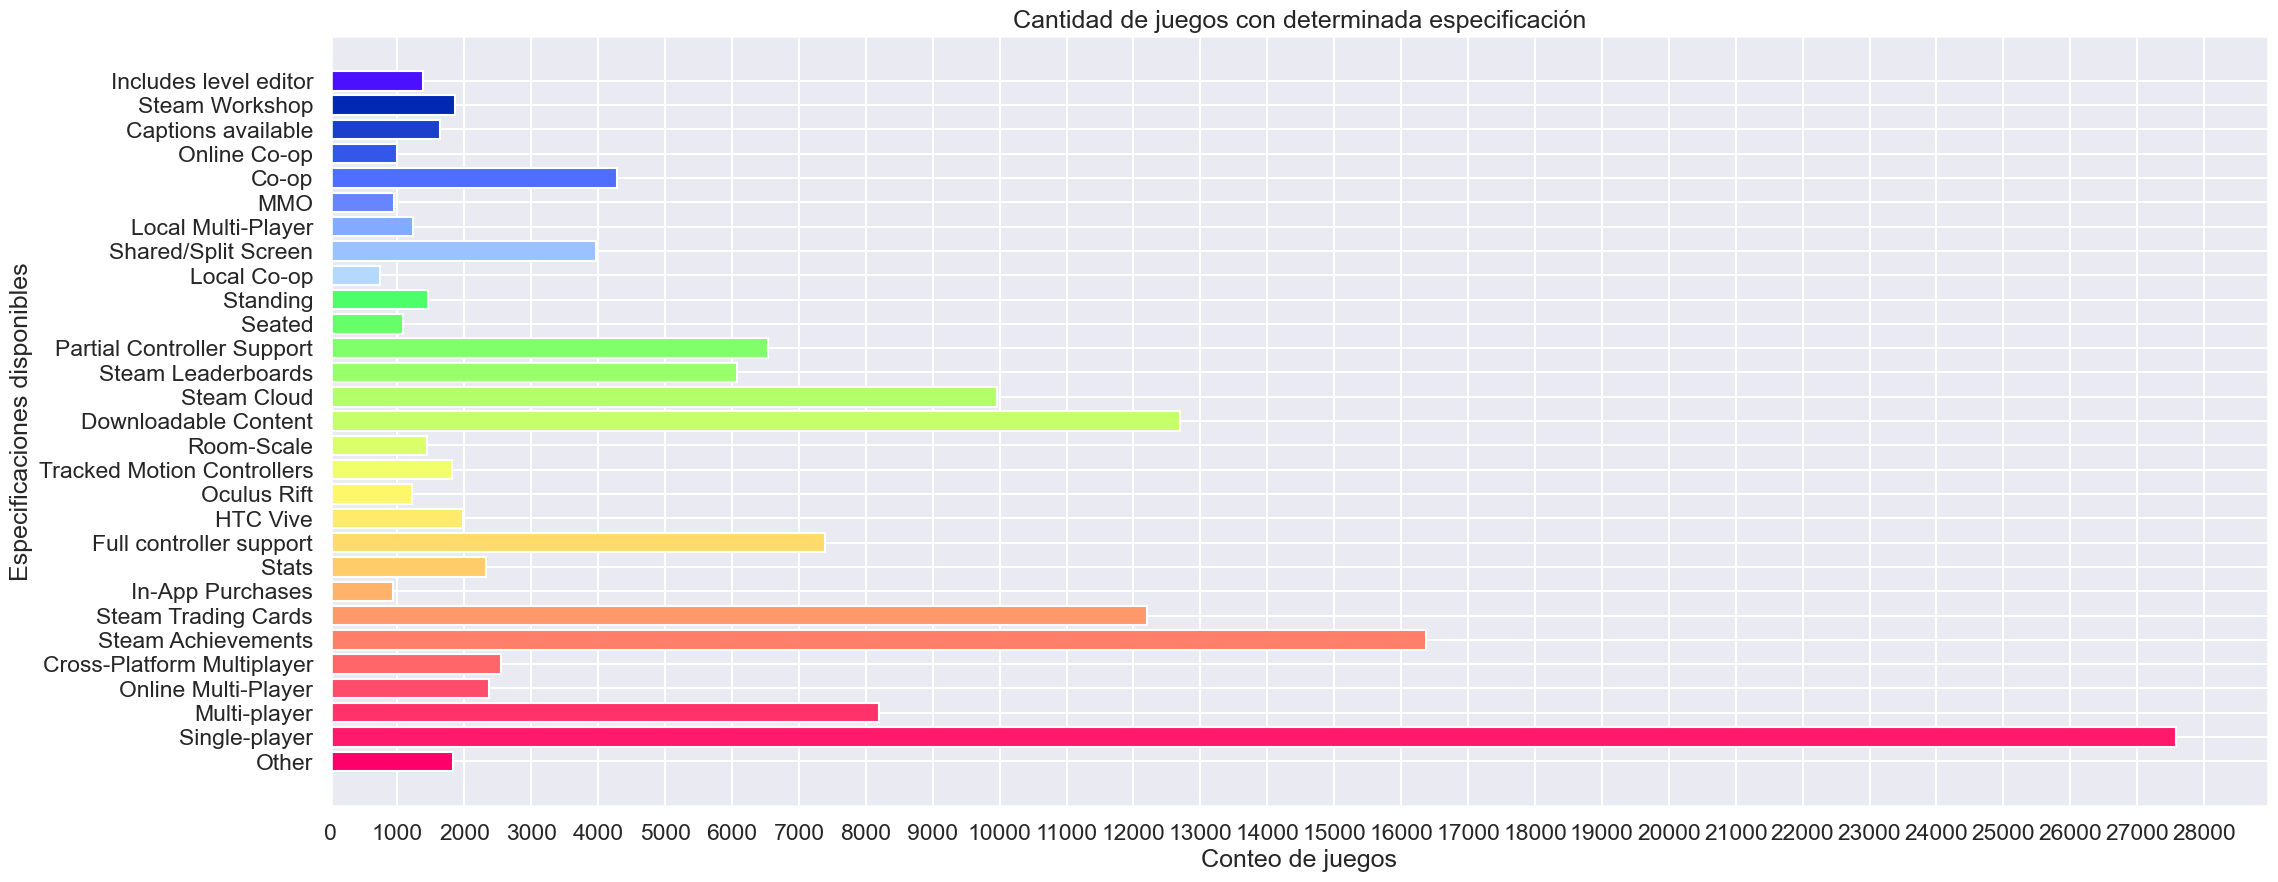

In [333]:
plt.figure(figsize= (25, 10))
plt.barh(list(specs.keys()), list(specs.values()), color= gradient_colors)
plt.title("Cantidad de juegos con determinada especificación")
plt.xlabel("Conteo de juegos")
plt.ylabel("Especificaciones disponibles")
plt.xticks(np.linspace(0,28000, 29))


plt.show()

Como podemos ver, el formato de juego **Single-Player** arrasa como especificación preferida para la creación de juegos. De todos los juegos, casi el 85% tiene esta especificación.